In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
#($\\theta$)

In [116]:
datosal1 = pd.read_csv("abs_al002.csv",sep=';')
datosal2 = pd.read_csv("abs_al004.csv",sep=';')
datosal3 = pd.read_csv("abs_al006.csv",sep=';')
datosal4 = pd.read_csv("abs_al008.csv",sep=';')
datosal5 = pd.read_csv("abs_al01.csv",sep=';')
datoscu = pd.read_csv("abs_cu.csv",sep=';')

datoszn1 = pd.read_csv("abs_zn0025.csv",sep=';')
datoszn2 = pd.read_csv("abs_zn005.csv",sep=';')
datoszn3 = pd.read_csv("abs_zn0075.csv",sep=';')
datoszn4 = pd.read_csv("abs_zn01.csv",sep=';')

angulo = datoszn1['ang'][2:]
angulo2 = datoscu['ang'][2:]
i_zn1 = datoszn1['intensidad'][2:]
i_zn2 = datoszn2['intensidad'][2:]
i_zn3 = datoszn3['intensidad'][2:]
i_zn4 = datoszn4['intensidad'][2:]

i_al1 = datosal1['intensidad'][2:]
i_al2 = datosal2['intensidad'][2:]
i_al3 = datosal3['intensidad'][2:]
i_al4 = datosal4['intensidad'][2:]
i_al5 = datosal5['intensidad'][2:]
i_cu = datoscu['intensidad'][2:]

def str_to_int(arr):
    new = []
    for i in arr:
        new.append(float(i))
    return np.array(new)
ang = str_to_int(angulo)
ang2 = str_to_int(angulo2)
I_zn1 = str_to_int(i_zn1)
I_zn2 = str_to_int(i_zn2)
I_zn3 = str_to_int(i_zn3)
I_zn4 = str_to_int(i_zn4)


I_al1 = str_to_int(i_al1)
I_al2 = str_to_int(i_al2)
I_al3 = str_to_int(i_al3)
I_al4 = str_to_int(i_al4)
I_al5 = str_to_int(i_al5)
I_cu = str_to_int(i_cu)
i_zn3,i_zn4

(2     40
 3     31
 4     25
 5     23
 6     20
 7     19
 8     16
 9     15
 10    15
 11    13
 12    15
 13    14
 14    15
 Name: intensidad, dtype: object,
 2     15
 3     11
 4     10
 5      8
 6      7
 7      7
 8      7
 9      6
 10     7
 11     6
 12     6
 13     6
 14     6
 Name: intensidad, dtype: object)

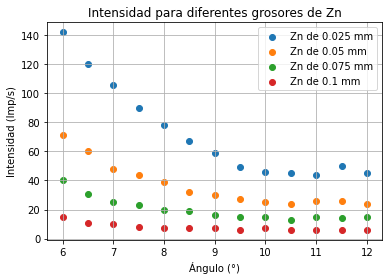

In [117]:
plt.scatter(ang,I_zn1,label='Zn de 0.025 mm')
plt.scatter(ang,I_zn2,label='Zn de 0.05 mm')
plt.scatter(ang,I_zn3,label='Zn de 0.075 mm')
plt.scatter(ang,I_zn4,label='Zn de 0.1 mm')
plt.title('Intensidad para diferentes grosores de Zn')
plt.ylabel('Intensidad (Imp/s)')
plt.xlabel('Ángulo (°)')
plt.grid()

plt.legend()

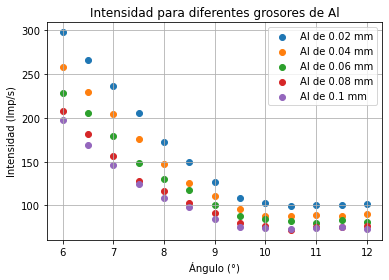

In [118]:
plt.scatter(ang,I_al1,label='Al de 0.02 mm')
plt.scatter(ang,I_al2,label='Al de 0.04 mm')
plt.scatter(ang,I_al3,label='Al de 0.06 mm')
plt.scatter(ang,I_al4,label='Al de 0.08 mm')
plt.scatter(ang,I_al5,label='Al de 0.1 mm')
plt.title('Intensidad para diferentes grosores de Al')
plt.ylabel('Intensidad (Imp/s)')
plt.xlabel('Ángulo (°)')
plt.grid()

plt.legend()

No handles with labels found to put in legend.


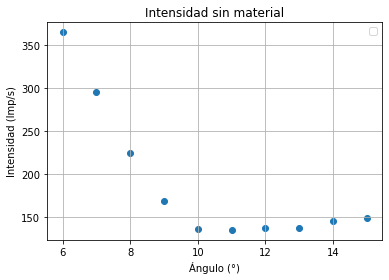

In [119]:
plt.scatter(ang2,I_cu)
plt.title('Intensidad sin material')
plt.ylabel('Intensidad (Imp/s)')
plt.xlabel('Ángulo (°)')
plt.grid()

plt.legend()


In [120]:
d_al = np.array([0.02,0.04,0.06,0.08,0.1])
d_zn = np.array([0.025,0.5,0.075,0.1])
d = 2.014e-10

def logazn (ang):
    arry = np.zeros(4)
    arry[0] = np.log(I_zn1[ang]/(I_zn1[2]))
    arry[1]  = np.log(I_zn2[ang]/(I_zn2[2]))
    arry[2]  = np.log(I_zn3[ang]/(I_zn3[2]))
    arry[3]  = np.log(I_zn4[ang]/(I_zn4[2]))

    return arry

def logaal (ang):
    arry = np.zeros(5)
    arry[0] = np.log(I_al1[ang]/(I_al1[2]))
    arry[1]  = np.log(I_al2[ang]/(I_al2[2]))
    arry[2]  = np.log(I_al3[ang]/(I_al3[2]))
    arry[3]  = np.log(I_al4[ang]/(I_al4[2]))
    arry[4]  = np.log(I_al5[ang]/(I_al5[2]))
    return arry
    
    


No handles with labels found to put in legend.


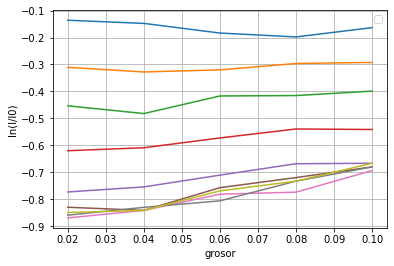

In [121]:
for i in range(3,12):
    plt.plot(d_al,logaal(i))


plt.ylabel('ln(I/I0)')
plt.xlabel('grosor')
plt.grid()

plt.legend()

No handles with labels found to put in legend.


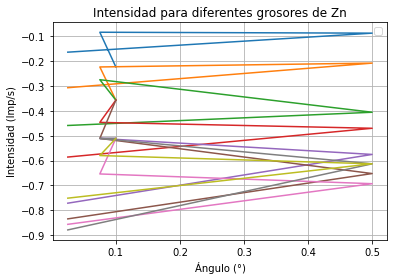

In [122]:
for i in range(3,12):
    plt.plot(d_zn,logazn(i))


plt.title('Intensidad para diferentes grosores de Zn')
plt.ylabel('Intensidad (Imp/s)')
plt.xlabel('Ángulo (°)')
plt.grid()

plt.legend()

In [146]:
datos4 = pd.read_csv("Actividad 4- Rayos Xf.csv",sep='\t')
df_separado = datos4['ang'].str.split(',', expand=True)
for column_name, column_data in df_separado.items():
    if column_name == 0:
          df_separado[column_name] = column_data.apply(lambda x: x.replace('\t', '') if isinstance(x, str) else x)
    df_separado[column_name] = column_data.apply(lambda x: x.replace('\t', '.') if isinstance(x, str) else x)
    df_separado[column_name] = pd.to_numeric(df_separado[column_name], errors='coerce') 

def fambda(teta):
     return 2*d*np.sin(teta*np.pi/180)

1.234687042578453e-10

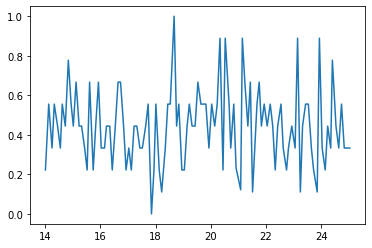

In [147]:
plt.plot(df_separado[0],df_separado[1]/np.max(df_separado[1]))
df_ang = 2*np.sin(df_separado[0])*d
a = np.where(df_separado[1] == np.min(df_separado[1]))
teta_min = df_separado[0][39]
l1 = fambda(teta_min)
l1

1.4487552873728653e-10

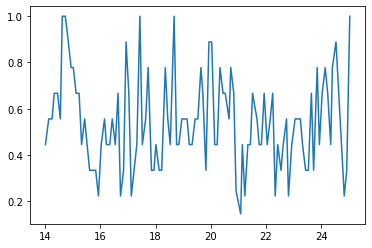

In [148]:
plt.plot(df_separado[0],df_separado[2]/np.max(df_separado[2]))
b = np.where(df_separado[2] == np.min(df_separado[2]))
teta_min2 = df_separado[0][71]
l2 = fambda(teta_min2)
l2

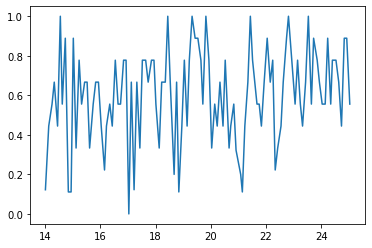

In [126]:
plt.plot(df_separado[0],df_separado[3]/np.max(df_separado[3]))
b = np.where(df_separado[2] == np.min(df_separado[2]))
teta_min2 = df_separado[0][71]


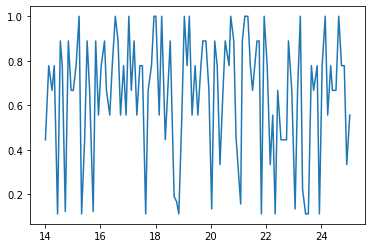

In [127]:
plt.plot(df_separado[0],df_separado[4]/np.max(df_separado[4]))

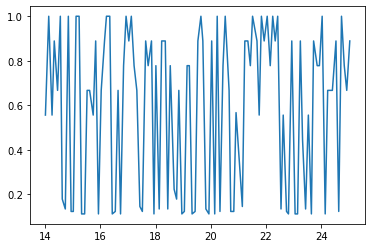

In [128]:
plt.plot(df_separado[0],df_separado[5]/np.max(df_separado[5]))

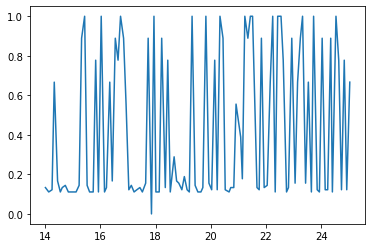

In [129]:
plt.plot(df_separado[0],df_separado[6]/np.max(df_separado[6]))